# Lecture 1
## By James Camacho

Covering:
- The derivative + trig basics,
- Fixed point iteration,
- Newton's method,
- Euler & Runge-Kutta methods.


In [35]:
# Imports
import numpy as np
import sympy as sp
import scipy

%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
# Approximate derivative of 2^x:

print("For base 2:")
for dx in [1, 0.1, 0.01, 0.001]:
    print(f"dx = {dx} => (2^dx - 1) / dx = {(2**dx - 1) / dx}")
    
print("\nFor base 3:")
for dx in [1, 0.1, 0.01, 0.001]:
    print(f"dx = {dx} => (3^dx - 1) / dx = {(3**dx - 1) / dx}")

For base 2:
dx = 1 => (2^dx - 1) / dx = 1.0
dx = 0.1 => (2^dx - 1) / dx = 0.7177346253629313
dx = 0.01 => (2^dx - 1) / dx = 0.6955550056718884
dx = 0.001 => (2^dx - 1) / dx = 0.6933874625807412

For base 3:
dx = 1 => (3^dx - 1) / dx = 2.0
dx = 0.1 => (3^dx - 1) / dx = 1.1612317403390437
dx = 0.01 => (3^dx - 1) / dx = 1.104669193785357
dx = 0.001 => (3^dx - 1) / dx = 1.0992159842040383


In [37]:
# Calculating e:

print("Calculating e = lim_(n → ∞) (1 + 1/n)^n:")
for n in [10, 100, 1000, 10000]:
    print(f"For n = {n}, (1 + 1/n)^n = {(1+1/n)**n}")

print("\nCalculating e = 1/0! + 1/1! + 1/2! + ...")
e = 0
factorial = 1
for i in range(1, 100):
    e += 1 / factorial
    factorial *= i
print(f"e = {e:.4f}")

Calculating e = lim_(n → ∞) (1 + 1/n)^n:
For n = 10, (1 + 1/n)^n = 2.5937424601000023
For n = 100, (1 + 1/n)^n = 2.7048138294215285
For n = 1000, (1 + 1/n)^n = 2.7169239322355936
For n = 10000, (1 + 1/n)^n = 2.7181459268249255

Calculating e = 1/0! + 1/1! + 1/2! + ...
e = 2.7183


In [38]:
# Fixed point iteration for cos.
from math import cos

x = 1
while x != cos(x):
    x = cos(x)
print(f"Fixed point of cos is {x:.4f}.")

x = 1
def f(x):
    return (7 * x**3 - 3 * x**2 - 2) ** 0.2

while x != f(x):
    x = f(x)
print(f"Fixed point of (7x^3 - 3x^2 - 2)^(1/5) = {x:.3f}")

Fixed point of cos is 0.7391.
Fixed point of (7x^3 - 3x^2 - 2)^(1/5) = 2.362


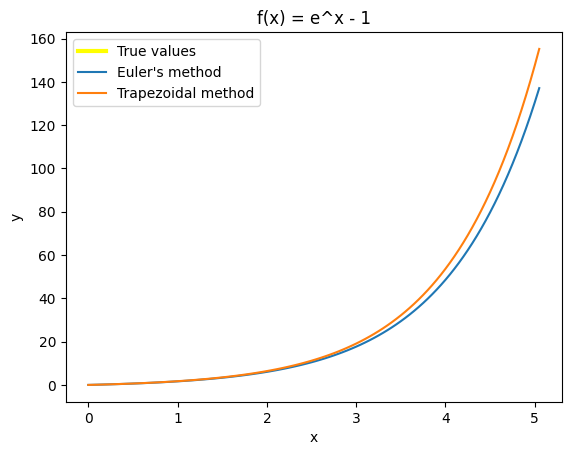

In [39]:
# Euler's and trapezoidal methods

def f_true(x):
    return np.exp(x) - 1

def f_prime(f, x):
    return f + 1

def euler(x, f, delta_x, x_end):
    points = [(x, f)]
    while x < x_end:
        f = f + delta_x * f_prime(f, x)
        x += delta_x
        points.append((x, f))
    return points

def trapezoid(x, f, delta_x, x_end):
    points = [(x, f)]
    while x < x_end:
        f = ((2 + delta_x)*f + 2*delta_x) / (2 - delta_x)
        x += delta_x
        points.append((x, f))
    return points

plt.plot(x, f_true(x), label="True values", linewidth=3, color="yellow")

points = euler(0, 0, 0.05, 5)
x, f = zip(*points)
plt.plot(x, f, label="Euler's method")

points = trapezoid(0, 0, 0.05, 5)
x, f = zip(*points)
plt.plot(x, f, label="Trapezoidal method")

plt.title("f(x) = e^x - 1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

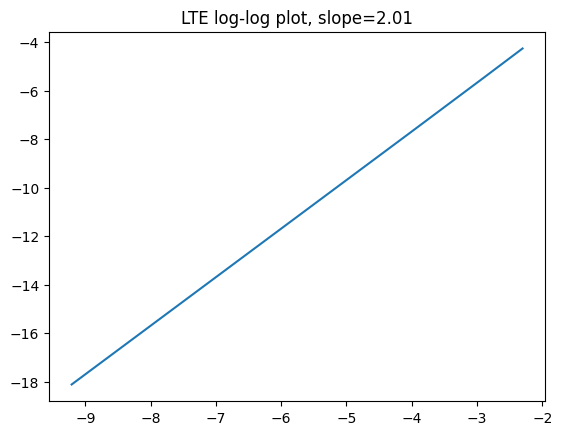

In [40]:
# Euler LTE
deltas = np.linspace(0.0001, 0.1, 1000)
errors = []
for delta_x in deltas:
    x, f = 1, f_true(1)
    x, f = x+delta_x, f + delta_x*f_prime(f, x)
    errors.append(abs(f - f_true(x)))

log_deltas = np.log(deltas)
log_errors = np.log(errors)
slope, _ = np.polyfit(log_deltas, log_errors, 1)

plt.title(f"LTE log-log plot, slope={slope:.2f}")
plt.plot(log_deltas, log_errors)
plt.show()

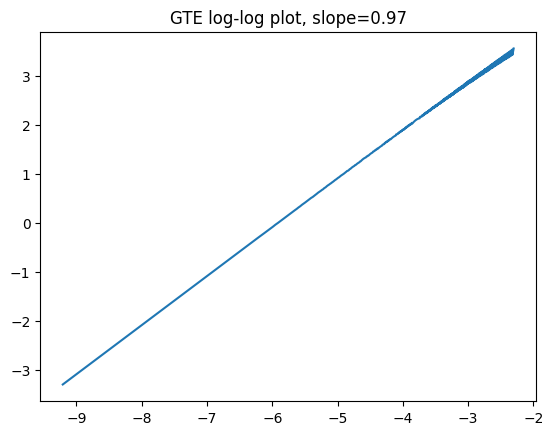

In [41]:
# Euler GTE
errors = []
for delta_x in deltas:
    x_end, f_end = euler(0, 0, delta_x, 5)[-1]
    errors.append(abs(f_end - f_true(x_end)))

log_deltas = np.log(deltas)
log_errors = np.log(errors)
slope, _ = np.polyfit(log_deltas, log_errors, 1)

plt.title(f"GTE log-log plot, slope={slope:.2f}")
plt.plot(log_deltas, log_errors)
plt.show()

In [159]:
# Multistep method coefficients

# Find explicit coefficients using s previous points. Breaks on s > 1 because combining Bashforth + BDF.
s = 2

x = np.arange(s+1)[..., np.newaxis]
r = np.arange(2*s)
A = (x**r / scipy.special.factorial(r)).T
B = np.vstack(([0]*(s+1), A[:-1, :]))
M = np.hstack((A, -B))

M = np.vstack(([0]*M.shape[-1], [0]*M.shape[-1], M))
M[1, -1] = 1
M[0, s] = 1
b = np.zeros(M.shape[0])
b[0] = 1

ab = np.linalg.solve(M, b)
a = -ab[:s]
b = ab[s+1:]

def Multistep(ts, ys, h, f):
    y = ys[-1]
    ys = np.concatenate((ys, [0]))
    ts = np.concatenate((ts, [ts[-1]+h]))
    y_old = y - 1
    while not np.allclose(y, y_old):
        y_old = y
        ys[-1] = y
        y = a @ ys[:-1] + h * np.sum(b @ f(ts, ys))
    return ts[-1], ys[-1]

In [160]:
print(a, b)
def y_true(t):
    return np.cos(t)**2

def f(t, y):
    return -2*y*np.sin(t)

h = 1e-4
ts = np.arange(s) * h
ys = y_true(ts)

t_end = 1

while ts[-1] < t_end:
    t, y = Multistep(ts, ys, h, f)
    ts = np.roll(ts, -1)
    ys = np.roll(ys, -1)
    ts[-1] = t
    ys[-1] = y
#     print(t, y, y_true(t))
print(t, y)
print(t, y_true(t))

[ 5. -4.] [2. 4. 0.]


/tmp/ipykernel_27138/204480996.py:6: RuntimeWarning: overflow encountered in multiply
  return -2*y*np.sin(t)
/tmp/ipykernel_27138/1798800152.py:30: RuntimeWarning: invalid value encountered in matmul
  y = a @ ys[:-1] + h * np.sum(b @ f(ts, ys))


KeyboardInterrupt: 

In [90]:
0.3148252802037863/0.16183424272828306

1.9453564023058618